# Course logistics in brief

Professor : Christopher Manning

What do we hope to teach?

1. An understaning of the effective modern methods for deep learning
    
    ⇒ Basic and key methods used in NLP
    
    ⇒ Recurrent networks, attention, etc.
    
2. An understanding of human languages and the difficulties in understanding and producing them
3. An understaing of and ability to build systems in PyTorch
    
    ⇒ Word meaning, dependency parsing, machine translation, question answering
    

> As written in PPT, exactly 10 minutes  are related about the course. I think you can just skip the first 6 minutes from 4:00. First 4 minutes are good for warming-up your listening skill.
>

# Human language and word meaning

단어라는 것은 상황에 따라 여러가지 의미를 가질 수 있다. 또한 대화에서 상대방이 어떻게 받아드리고 이해하는지에 따라 의미가 어투가 달라질 수 있다. 

Natural language is not formal. That’s why it is so hard to make machine to understand our language. 

Human beings have a huge difference with orangutan which is writing skils. Writing have an ability where we could take knowledge not only communicate with people through mouth to mouth.

- NLTK (Natural Language Toolkit)
    
    A leading platform for building Python to work with human language data.
    
    NLTK packages provide 4 things.
    
    1. 말뭉치(corpus)
        
        자연어 분석 작업을 위해 만든 샘플 문서 집합
        
    2. 토큰 생성(token)
        
        자연어 문서를 분석하기 위해 긴 문자열을 분석을 위한 작은 단위로 나누는 작업을 하는데, 이때 사용하는 문자열 단위
        
    3. 형태소 분석(morpheme)
        
        언어학에서 일정한 의미가 있는 가장 작은 말의 단위
        
        - 어간 추출(stemming) : 변화된 단어의 접미사나 어미를 제거하여 같은 의미를 가지는 형태소의 기본형을 찾는 방법
        - 원형 복원(lemmatizing) : 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업
        - 품사 부착 : 품사를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있음
    4. 품사 태깅
        
        품사(POS, part-of-speech)란 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것
        
        - NNP : 단수 고유명사
        - VB : 동사
        - VBP : 동사 현재형
        - TO : to 전치사
        - NN : 명사(단/복)
        - DT : 관형사
    
    - WordNet
        
        a thesaurus containing lists of **synonym sets**(동의어 집합), **hypernyms**(상의어) and **hyponymy**(하의어)

# Representing words as discrete symbols

In traditional NLP, words can be represented by **one-hot vectors**.

Vector dimension == number of words in vocabulary.

If we want to represent bigger words or long sentences, we need very big vectors . Then we end up with an infinite space of words. This is a minor problem.

A major problem is understanding relationships and the meaning of words.

For example, if user search for ‘Seoul motel’, we would like to match documents containing ‘Seoul hotel’ which is pretty much same thing with Seoul motel. However, if we use previous way to represent words, there is no similarity relationships between them. (In math terms, two vectors are orthorgonal, dot product of two vectors equal to 0)

# Representing words by their context

- Distributional semantics :
    
    *A word’s meaning is given by the words that frequently appear close-by.*
    
    비슷한 문백을 가진 단어는 비슷한 의미를 가진다.
    
    > ”You shall know a word by the company it keeps.”- J. R. Firth

When a word **w** appears in a text, its **“context”** is the set of words that appear nearby (within a fixed-size window). The context words will represent banking.

문장의 문맥으로 문장의 특정 단어를 표현 할 수 있다.

# Word vectors

We will build a dense vector for each words, chosen so that it is similar to vectors of words that appear in similar contexts. Word vectors are sometimes called ‘**word embeddings**’ or ‘**word representations**’. They are a distributed representation. 

⇒ word vectors는 분산 표현이며 nonzero element로 구성되어 있다.

If we use one-hot vectors to represent a long sentence, then we might need over 100 dimensional word vectors but it can be projected down into two dimensions which is quite simple.

# Word2vec

- Word2vec
    
    A framework for learning word vectors
    
    - We  have a large corpus of text
        
        > corpus : large pile of text
        > 
    - Every word in a fixed vocabulary is represented by a vector
    - Go through each position *t* in the text, which has a center word *c* and context(”outside”) words *o*
    - Use the similarity of the word vectors for *c* and *o* to calculate the probability of *o* given *c* (or vice versa)
    - Keep adjusting the word vectors to maximize this probability
    

What we are going to do is the big iterative algorithm where we go through each position in the text. Look at the words around the text

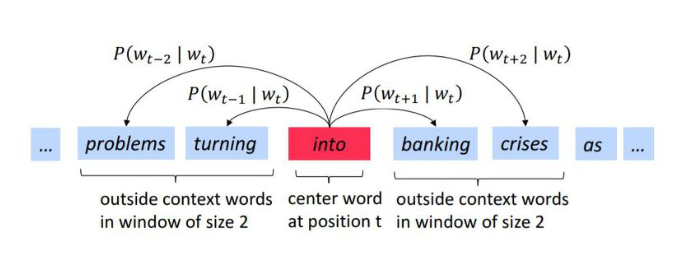

We’ve got part of our corpus ‘problems turning into bannking crises’. We want to know the meaning of the word ‘into’ and so we’re going to hope that its representation can be used in a way that make precise to predict what words appear in the context of ‘into’ because that is the meaning of the ‘into’.